# Neural Network to Read Handwriting

# Advanced Level Task-1

## Import required libraries and packages

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax 

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow.keras import layers

## Load the MNIST Dataset

The MNIST dataset is a widely used dataset in machine learning and consists of a set of 60,000 training images and 10,000 test images of handwritten digits from 0 to 9.

In [3]:
# load the data 
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

## Preprocess the data

In [4]:
## checking the shapes of training and testing dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
#  displayiing the data of x_train
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


#### 1.Reshaping the input data which is work as a input for CNN
#### 2.The original shape of x_train is (num_train_samples, 28, 28), where num_train_samples is the number of training samples, and 28 by 28 represents the dimensions of each image
#### 3.CNN takes the input data with the shape,(num_samples, height, width, channels)..
#### 4.Images are grayscale, so the channel value is set to 1
#### 5.After reshaping the datatype of array will change to float32 which is common data type used in deep learning.

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

## Normalization

The original pixel values in the MNIST dataset range from 0 to 255, where 0 represents black and 255 represents white.
Dividing the pixel values by 255 normalizes the data so that the values are scaled between 0 and 1.

In [7]:
x_train /= 255
x_test /= 255
print(x_train.dtype)
print(x_test.dtype)

float32
float32


In [8]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Building the neural network architecture

In [9]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 10)                77450     
                                                                 
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
____________________________________________________

This summary shows that the model has five layers:

Conv2D: This layer performs convolutional operations on the input. It has 32 filters of size 3x3 and applies the
ReLU activation function. The output shape is (None, 26, 26, 32), where None represents the batch size.

MaxPooling2D: This layer performs max pooling, which reduces the spatial dimensions of the input.
It uses a 2x2 pooling window. The output shape is (None, 13, 13, 32), as the pooling operation reduces each spatial
dimension by a factor of 2.

Conv2D: This layer is similar to the previous Conv2D layer but has 64 filters instead of 32.
The output shape is (None, 11, 11, 64).

Flatten: This layer flattens the previous output, converting it from a 4D tensor to a 2D tensor.
The output shape is (None, 7744), where 7744 is the result of multiplying the spatial dimensions.

Dense: This layer is a fully connected layer with 10 units and applies the ReLU activation function.
It takes the flattened input and produces an output of shape (None, 10), where 10 represents the number of classes in
the classification task.

## plot a neural network model

## Compile the model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model

In [12]:
# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 49s - loss: 0.2572 - accuracy: 0.9281 - val_loss: 0.0776 - val_accuracy: 0.9756 - 49s/epoch - 165ms/step
Epoch 2/10
300/300 - 48s - loss: 0.0745 - accuracy: 0.9776 - val_loss: 0.0571 - val_accuracy: 0.9820 - 48s/epoch - 160ms/step
Epoch 3/10
300/300 - 53s - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0505 - val_accuracy: 0.9846 - 53s/epoch - 176ms/step
Epoch 4/10
300/300 - 45s - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0416 - val_accuracy: 0.9867 - 45s/epoch - 151ms/step
Epoch 5/10
300/300 - 49s - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0374 - val_accuracy: 0.9889 - 49s/epoch - 162ms/step
Epoch 6/10
300/300 - 51s - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0383 - val_accuracy: 0.9879 - 51s/epoch - 171ms/step
Epoch 7/10
300/300 - 51s - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0382 - val_accuracy: 0.9880 - 51s/epoch - 170ms/step
Epoch 8/10
300/300 - 46s - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0398 - val_accuracy: 0.9882 - 46s/epoch - 155

## Grayscale Image

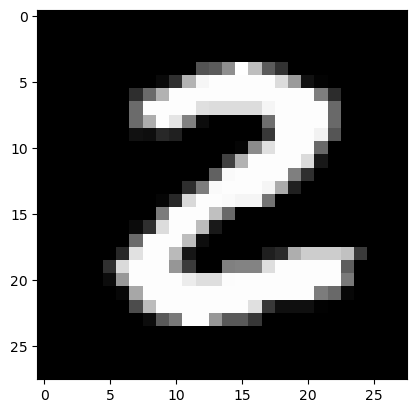

In [13]:
#Displaying a Grayscale Image
img = x_train[25]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

## Evaluate the model

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 10ms/step - loss: 0.0369 - accuracy: 0.9888
Test accuracy: 0.9887999892234802


In [15]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 98.88%


## Predicting the Result

In [16]:
img= img.reshape(1, 28, 28, 1)
a= model.predict([img])
predicted_class = np.argmax(a)
print("Predicted class: {}".format(predicted_class))

1/1 [==============================] - 1s 594ms/step
Predicted class: 2


# Conclusion

### Prediction accuracy is about 98.88%.

#### -------------------------------------------------------------------------